Iteration 1
Iteration 2
Iteration 3
[0.2, 0.9, 0.5]


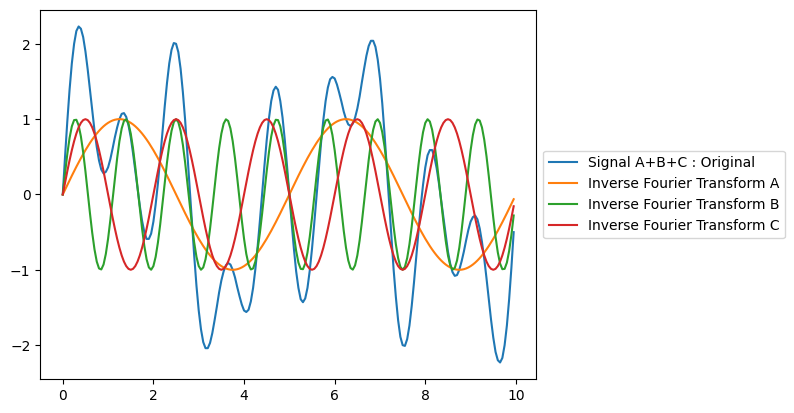

In [88]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

time_step = 0.05
time_vec = np.arange(0, 10, time_step)

signal_a_frequency = 0.2
signal_a_period = 1/signal_a_frequency

signal_b_frequency = 0.9
signal_b_period = 1/signal_b_frequency

signal_c_frequency = 0.5
signal_c_period = 1/signal_c_frequency

signal_a = np.sin(signal_a_frequency*2*np.pi*time_vec)
signal_b = np.sin(signal_b_frequency*2*np.pi*time_vec)
signal_c = np.sin(signal_c_frequency*2*np.pi*time_vec)

combined_signal = np.add(signal_a, signal_b)
combined_signal = np.add(combined_signal, signal_c)

combined_signal = np.round(combined_signal, 2)

#print(signal_a.shape, signal_b.shape, combined_signal.shape)

def get_freqs_above_high_pass(signal, n_frequencies=1, threshold=1e-1, breakpoint=10):
    
    complex_zero = 0.00000000e+00+0.j
    
    signal_fft = fftpack.fft(signal.copy())    
    amplitude = np.abs(signal_fft)
    sample_freq = fftpack.fftfreq(signal.size, d=time_step)
    amplitude_frequency = np.array([amplitude, sample_freq])
    peak_amplitude_positions = list()
    
    top_n_frequencies = list()
    
    amplitude_copy = amplitude.copy()
    count = 1
    while len(top_n_frequencies) < n_frequencies:
        print('Iteration', count)
        
        current_max = amplitude_copy.max()
        #peak_amplitude_position = amplitude_copy.argmax()
        current_max_indices = np.where(amplitude_copy == current_max)

        peak_frequency = amplitude_frequency[1, current_max_indices[0][0]]
        
        #print('current_max:', current_max)
        #print('positions_of_current_max:', current_max_indices)
        #print('peak_frequency:', peak_frequency)
        
        amplitude_copy[current_max_indices] = float(0)
        
        top_n_frequencies.append(peak_frequency)
        
        count += 1
        
        if count >= breakpoint:
            break
        
    #print(top_n_frequencies)
    return(top_n_frequencies)



    

    
top_frequencies = get_freqs_above_high_pass(combined_signal, n_frequencies=3)

sample_freq = fftpack.fftfreq(combined_signal.size, d=time_step)

signal_fft = fftpack.fft(combined_signal)

high_frequency_fft_a = signal_fft.copy()
high_frequency_fft_a[np.abs(sample_freq) != top_frequencies[0]] = 0
filtered_signal_a = fftpack.ifft(high_frequency_fft_a)

high_frequency_fft_b = signal_fft.copy()
high_frequency_fft_b[np.abs(sample_freq) != top_frequencies[1]] = 0
filtered_signal_b = fftpack.ifft(high_frequency_fft_b)

high_frequency_fft_c = signal_fft.copy()
high_frequency_fft_c[np.abs(sample_freq) != top_frequencies[2]] = 0
filtered_signal_c = fftpack.ifft(high_frequency_fft_c)

#inverst_fourier_1_freq = top_frequencies

print(top_frequencies)

#plt.plot(time_vec, signal_a, label='Signal A : Original')
#plt.plot(time_vec, signal_b, label='Signal B : Original')
plt.plot(time_vec, combined_signal, label='Signal A+B+C : Original')
plt.plot(time_vec, filtered_signal_a, label='Inverse Fourier Transform A')
plt.plot(time_vec, filtered_signal_b, label='Inverse Fourier Transform B')
plt.plot(time_vec, filtered_signal_c, label='Inverse Fourier Transform C')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#sample_freq


In [47]:
1e2

100.0

In [ ]:

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
axs[0].plot(sample_freq, amplitude)
axs[0].set_title('Amplitude')

# Plot the second subplot
axs[1].plot(sample_freq, high_frequency_fft)
axs[1].set_title('High Frequency FFT')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
x = amplitude_frequency[0, :].copy()
x = np.sort(x)[::-1]
x = np.array(x, dtype=np.int16)
x

In [ ]:
high_frequency_fft

In [ ]:

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
axs[0].plot(sample_freq, amplitude)
axs[0].set_title('Amplitude')

# Plot the second subplot
axs[1].plot(sample_freq, high_frequency_fft)
axs[1].set_title('High Frequency FFT')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()